In [ ]:
from IPython.display import clear_output

In [ ]:
!pip install pennylane

clear_output()

In [ ]:
import pennylane as qml

In [ ]:
from pennylane import numpy as np

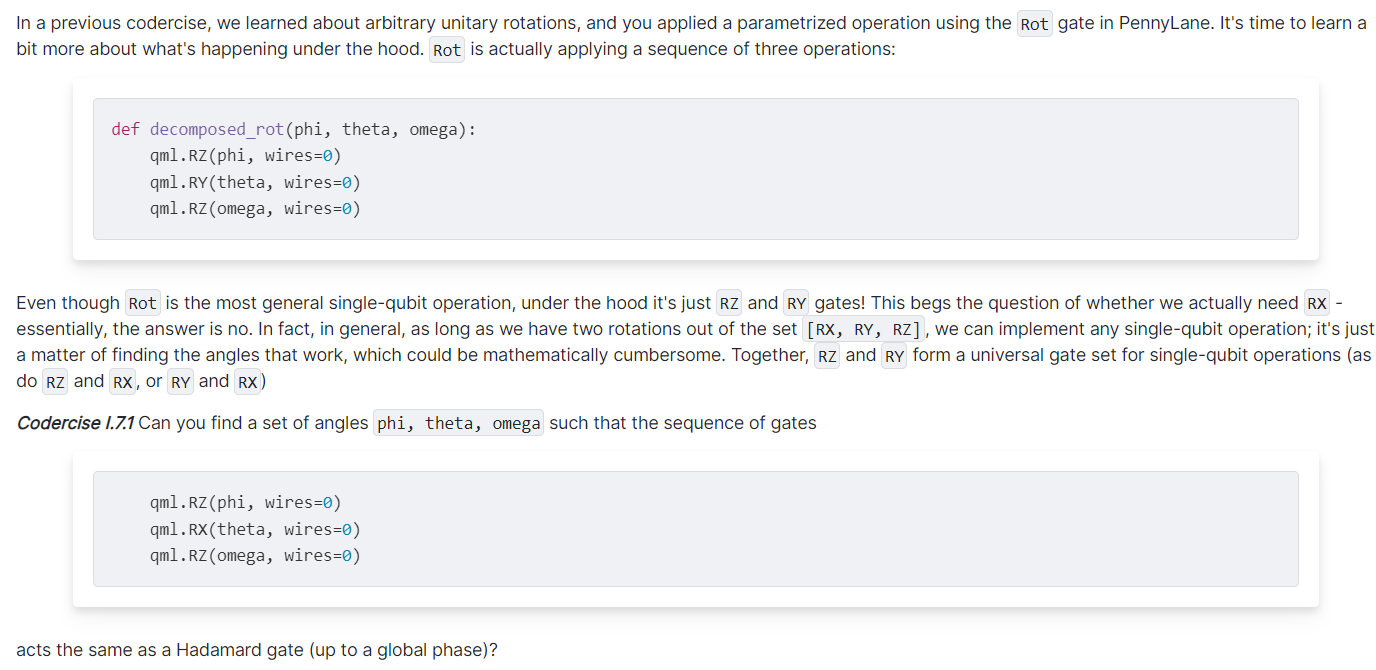

In [ ]:
#I.7.1.
dev = qml.device("default.qubit", wires=1)

# ADJUST THE VALUES OF PHI, THETA, AND OMEGA
phi, theta, omega = np.pi/2, np.pi/2, np.pi/2

@qml.qnode(dev)
def hadamard_with_rz_rx():

    #Produces the Hadamard (up to a global phase)
    qml.RZ(phi, wires=0)
    qml.RX(theta, wires=0)
    qml.RZ(omega, wires=0)
    return qml.state()

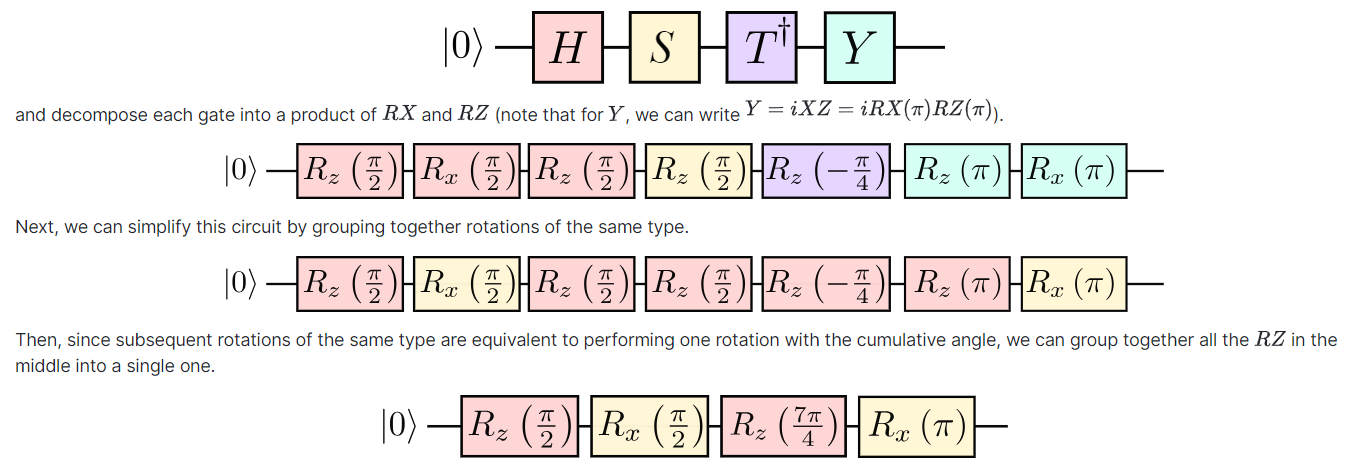

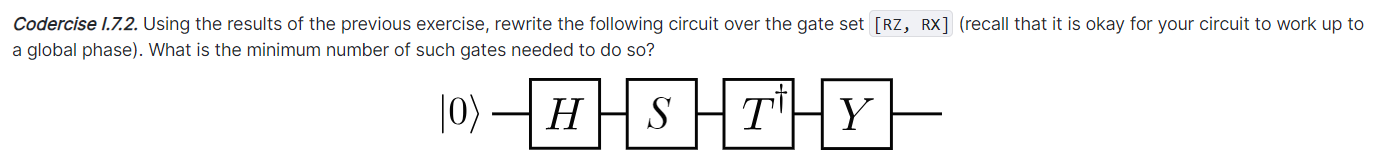

In [ ]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def convert_to_rz_rx():
    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE CIRCUIT IN THE PICTURE USING ONLY RZ AND RX
    qml.RZ(np.pi/2, wires=0)
    qml.RX(np.pi/2, wires=0)
    qml.RZ(np.pi/2, wires=0)

    #S
    qml.RZ(np.pi/2, wires=0)

    #T*
    qml.RZ(-np.pi/4, wires=0)

    #Y
    qml.RX(np.pi, wires=0)
    qml.RZ(np.pi, wires=0)


    return qml.state()


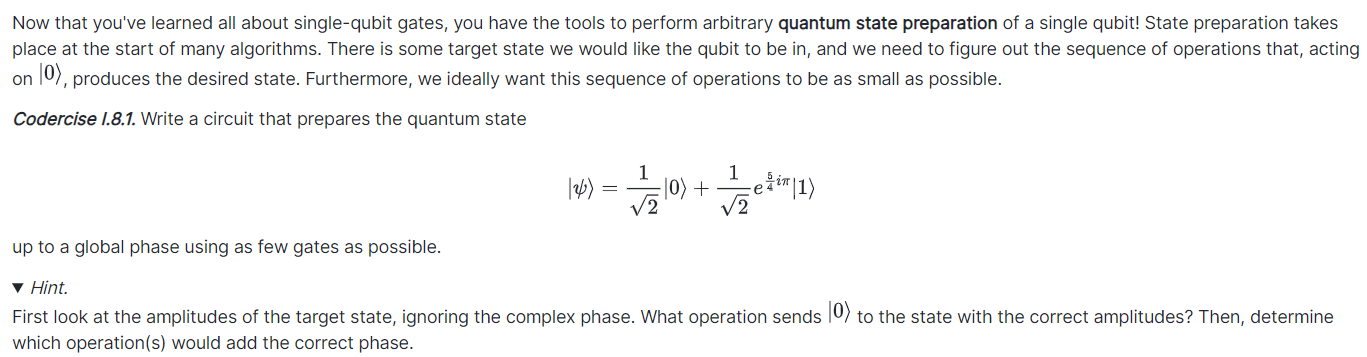

In [ ]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def prepare_state():
    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY OPERATIONS TO PREPARE THE TARGET STATE
        #Prepare the state to |+>
    qml.Hadamard(wires=0)

    #Change the relative phase of |1> to e^(i*pi*5/4)
    for i in range(5):
        qml.T(wires=0)

    return qml.state()


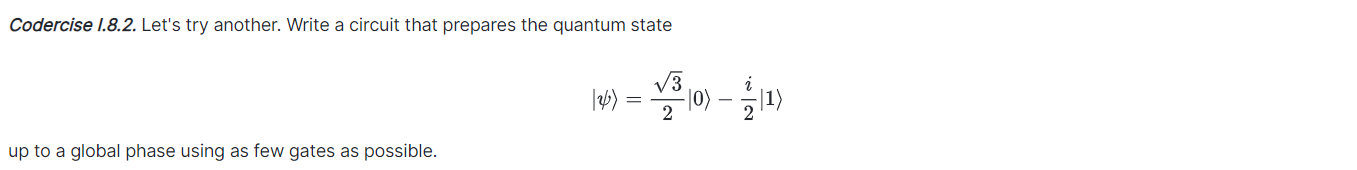

In [ ]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def prepare_state():
    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY OPERATIONS TO PREPARE THE TARGET STATE
    qml.RX(np.pi / 3, wires=0)

    return qml.state()


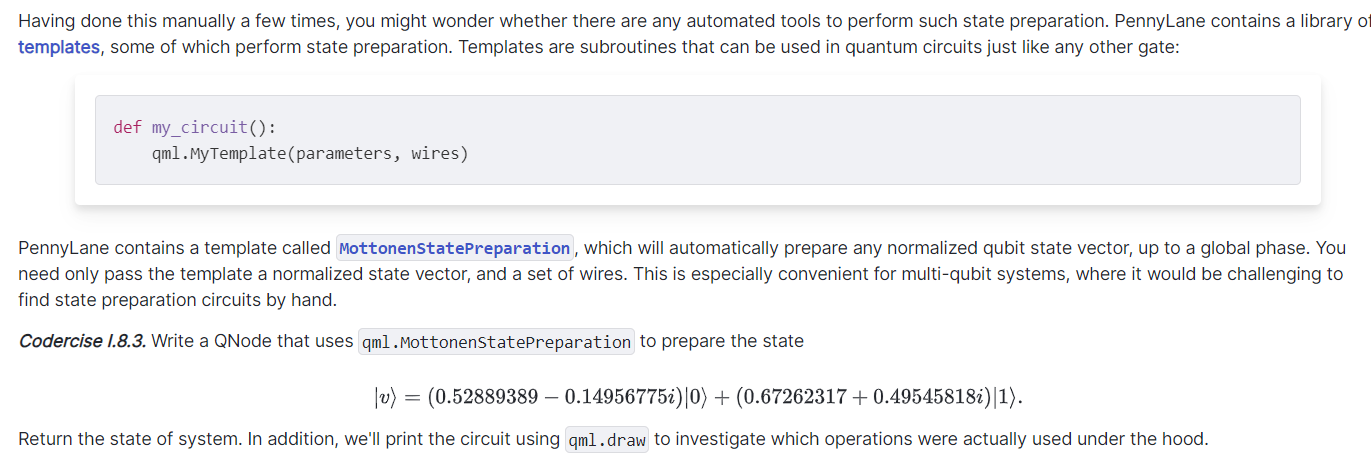

In [ ]:
v = np.array([0.52889389-0.14956775j, 0.67262317+0.49545818j])

# CREATE A DEVICE
dev = qml.device('default.qubit', wires=1)

# CONSTRUCT A QNODE THAT USES qml.MottonenStatePreparation
# TO PREPARE A QUBIT IN STATE V, AND RETURN THE STATE
@qml.qnode(dev)
def prepare_state(state=v):
    qml.MottonenStatePreparation(state, wires=0)
    return qml.state()

# This will draw the quantum circuit and allow you to inspect the output gates
print(prepare_state(v))
print()
print(qml.draw(prepare_state)(v))

[0.49365933-0.24166034j 0.75032489+0.36730546j]

0: ──MottonenStatePreparation(M0)─┤  State

M0 = 
[0.52889389-0.14956775j 0.67262317+0.49545818j]


In [ ]:
#I.9.1.
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def apply_h_and_measure(state):
    # Force the state to be 0
    if state == 1:
        qml.PauliX(wires=0)

    # Apply H and return measurement
    qml.Hadamard(wires=0)
    return qml.probs(wires=0)

print(apply_h_and_measure(0))
print(apply_h_and_measure(1))

In [ ]:
#I.9.2
# Prepares the state (1/2)|0> + i(sqrt(3)/2)|1>
def prepare_psi():
    qml.RX(np.pi / 3, wires=0)
    qml.PauliX(wires=0)


# Quantum function that maps |0> TO |y_+> and |1> TO |y_->
def y_basis_rotation():
    qml.Hadamard(wires=0)
    qml.S(wires=0)

In [ ]:
#I.9.3
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def measure_in_y_basis():
    #State preparation
    prepare_psi()

    # PERFORM THE ROTATION BACK TO COMPUTATIONAL BASIS
    qml.adjoint(y_basis_rotation)()

    # RETURN THE MEASUREMENT OUTCOME PROBABILITIES
    return qml.probs(wires=0)

print(measure_in_y_basis())